In [ ]:
import pytesseract
import shutil
import os, sys
import PyPDF2
import warnings 
import random
import keras_ocr
import tempfile
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from pdf2image import convert_from_path, convert_from_bytes
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
!pip install pytesseract
!pip install PyPDF2
!pip install keras-ocr
!pip install pdf2image
!apt-get install poppler-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.86.1-0ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


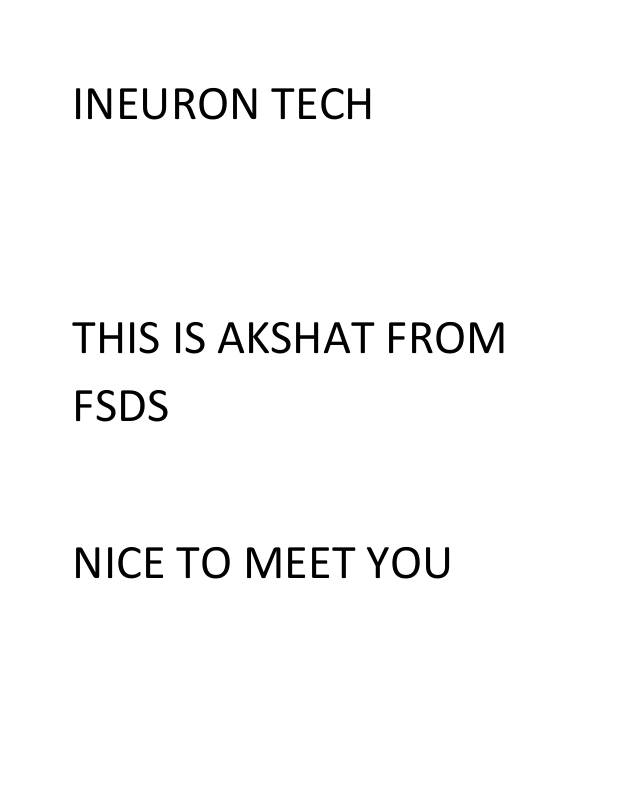

In [ ]:
from pdf2image import convert_from_path, convert_from_bytes
from IPython.display import display, Image

images = convert_from_bytes(open('gg.pdf', 'rb').read(), size=800)
display(images[0])
images = convert_from_path('gg.pdf')
 
for i in range(len(images)):
   
      # Save pages as images in the pdf
    images[i].save('page'+ str(i) +'.jpg', 'JPEG')


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 1s 553ms/step


1/1 [==============================] - 3s 3s/step


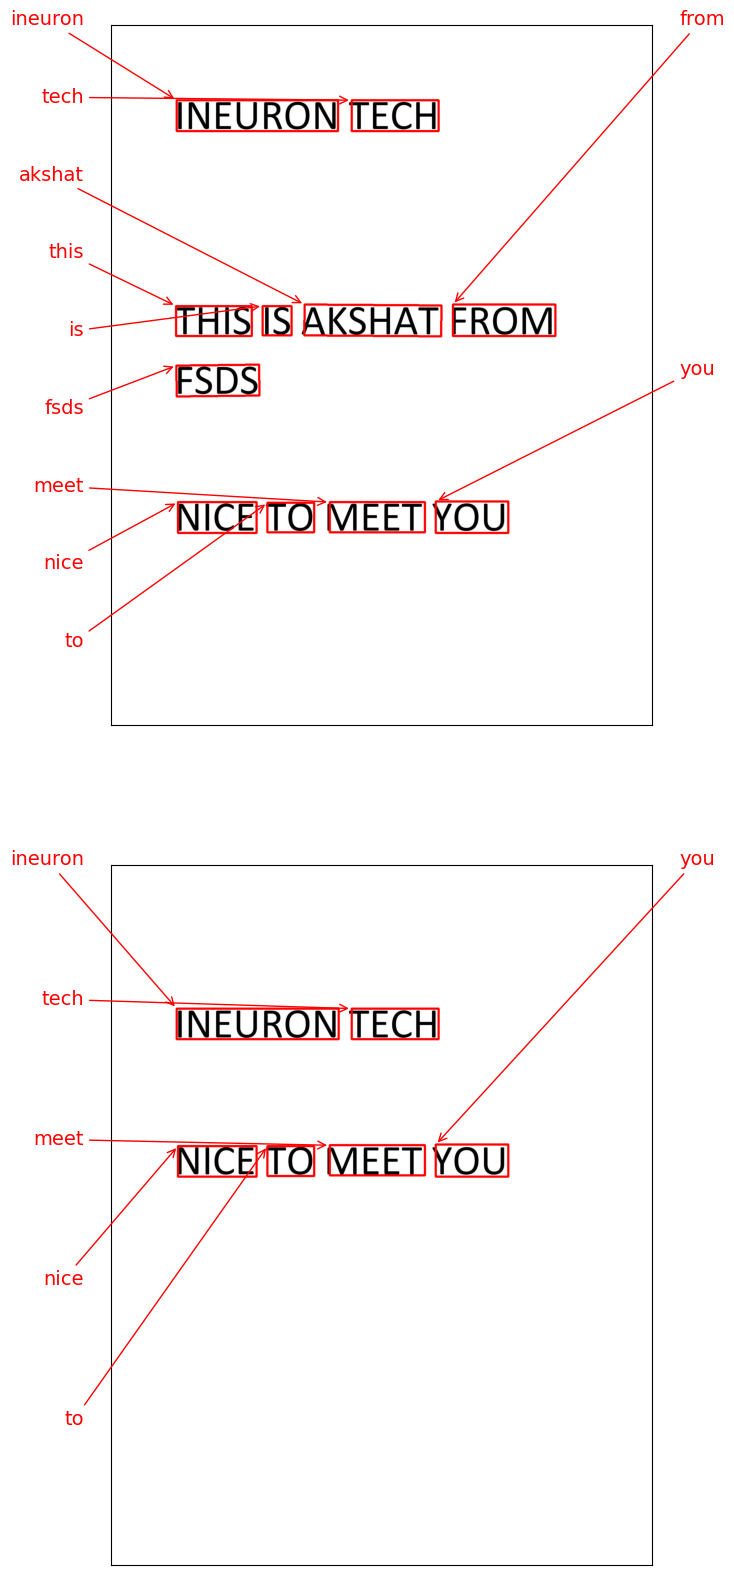

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()


images = [keras_ocr.tools.read(pdf) for pdf in ['page0.jpg','page1.jpg']]

prediction_groups = pipeline.recognize(images)

fig, axs = plt.subplots(nrows=len(images), figsize = (10,20))
for ax, image, predictions in zip(axs, images, prediction_groups):
  keras_ocr.tools.drawAnnotations(image=image,
                                  predictions = predictions,
                                  ax = ax)

In [ ]:
for i in prediction_groups:
  predicted_image = prediction_groups[0]
  u = {}
  for text, box in predicted_image:
    u[text] = predicted_image.count(text)
for i in prediction_groups:
  predicted_image = prediction_groups[1]
  for text, box in predicted_image:
       if text in u:
        u[text] += 1
       else:
        u[text] = 1

print(u)

{'ineuron': 2, 'tech': 2, 'from': 0, 'akshat': 0, 'this': 0, 'is': 0, 'fsds': 0, 'you': 2, 'nice': 2, 'meet': 2, 'to': 2}


In [ ]:
data = pd.DataFrame([u])

In [ ]:
data

,ineuron,tech,from,akshat,this,is,fsds,you,nice,meet,to
0,2,2,0,0,0,0,0,2,2,2,2


In [ ]:
data.to_csv("Words_count.csv")